In [1]:
# run this to make sure we have all necessary SAT problem generating functions available
%run sat_generator.ipynb

In [2]:
import random
import math
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def flip_optimal(random_clause, clauses):
    variables_in_random_clause = random_clause.get_variables()
    max_sat_count = -math.inf
    max_sat_var = random.choice(list(variables_in_random_clause))
    for v in variables_in_random_clause:
        sat_count = 0
        curr_v_val = v.get_val()
        for c in clauses:
            c_copy = Clause(c.variables.copy())
            for var_copy in c_copy.variables:
                if var_copy == v:
                    var_copy.set_val(1 - curr_v_val)
            if c_copy.is_satisfied():
                sat_count += 1
        if sat_count > max_sat_count:
            max_sat_count = sat_count
            max_sat_var = v
    return max_sat_var

In [4]:
def mc_sat(s, clauses, weights, num_samples):
    # satisfy hard clauses -- in our case, all weights are 1 so a random solution is selected
    x = SAT(set(clauses))
    variables_in_s = s.get_variables()
    num_c_sat_over_time = []
    p = 0.7 # probability of choosing an optimal flip vs. a random flip in the next iteration
    # set all variables to random 0 / 1
    for v in variables_in_s:
        v.set_val(random.choice([0, 1]))
    for i in range(num_samples):
        M = [] # clauses that will be satisfied in this step
        k = 0 # clause index
        curr_c_sat = 0
        if x.is_satisfied():
            return x.is_satisfied(), x.variables, num_c_sat_over_time # the SAT problem has been solved
        for c in x.clauses: # for all clauses satisfied by the previous step x^(i - 1)
            if c.is_satisfied():
                curr_c_sat += 1
                append_prob = random.random() # 1 - e^(-w_k)
                if append_prob > math.e**(-weights[k]):
                    M.append(c)
            k += 1
        num_c_sat_over_time.append(curr_c_sat)
        # sample x_i from U_SAT(M)
        # pick a clause unsatisfied by current assignment
        not_M_C = [c for c in clauses if c not in M]
        random_clause = random.choice(not_M_C)
        flip_prob = random.random()
        # p: flip variable that will result in fewest previously satisfied clauses becoming unsatisfied
        # 1 - p: flip variable at random
        if flip_prob < p:
            flip_var = flip_optimal(random_clause, clauses)
        else:
            random_flipped_idx = math.floor(random.random() * len(variables_in_s))
            flip_var = variables_in_s[random_flipped_idx]
        curr_val = flip_var.get_val()
        flip_var.set_val(1 - curr_val)
    return x.is_satisfied(), x.variables, num_c_sat_over_time

In [5]:
# SAT problem size upper bounds
prob_sizes = {"small": 10, "med": 30, "large": 50}
lower_bounds = {"small": 1, "med": 10, "large": 30}
num_probs = 10000

In [6]:
curr_size = "small"

In [7]:
cols = ["x" + str(i) for i in range(prob_sizes[curr_size])]

In [8]:
# generate SAT problems of a specific size (small, med, large)
curr_sat_df = pd.DataFrame(columns = ["prob_id"] + cols, data = None)

lower_bound = lower_bounds[curr_size]
upper_bound = prob_sizes[curr_size]

for i in range(num_probs):
    print("prob", i)
    Variable.reset_id()
    factory = SAT_Factory(upper_bound, upper_bound, lower_bound, lower_bound)
    s = factory.generate_random_instance()
    for c in s.clauses:
        new_row = dict.fromkeys(cols, 0)
        new_row["prob_id"] = i
        for j in range(len(list(c.get_variables()))):
            curr_item = c.__getitem__(j)
            curr_var = "x" + str(curr_item[0].id)
            curr_neg = curr_item[1] if curr_item[1] == 1 else -1
            new_row[curr_var] = curr_neg
        curr_sat_df = curr_sat_df.append(new_row, ignore_index = True)
curr_sat_df.head()

prob 0
prob 1
prob 2
prob 3
prob 4
prob 5
prob 6
prob 7
prob 8
prob 9
prob 10
prob 11
prob 12
prob 13
prob 14
prob 15
prob 16
prob 17
prob 18
prob 19
prob 20
prob 21
prob 22
prob 23
prob 24
prob 25
prob 26
prob 27
prob 28
prob 29
prob 30
prob 31
prob 32
prob 33
prob 34
prob 35
prob 36
prob 37
prob 38
prob 39
prob 40
prob 41
prob 42
prob 43
prob 44
prob 45
prob 46
prob 47
prob 48
prob 49
prob 50
prob 51
prob 52
prob 53
prob 54
prob 55
prob 56
prob 57
prob 58
prob 59
prob 60
prob 61
prob 62
prob 63
prob 64
prob 65
prob 66
prob 67
prob 68
prob 69
prob 70
prob 71
prob 72
prob 73
prob 74
prob 75
prob 76
prob 77
prob 78
prob 79
prob 80
prob 81
prob 82
prob 83
prob 84
prob 85
prob 86
prob 87
prob 88
prob 89
prob 90
prob 91
prob 92
prob 93
prob 94
prob 95
prob 96
prob 97
prob 98
prob 99
prob 100
prob 101
prob 102
prob 103
prob 104
prob 105
prob 106
prob 107
prob 108
prob 109
prob 110
prob 111
prob 112
prob 113
prob 114
prob 115
prob 116
prob 117
prob 118
prob 119
prob 120
prob 121
prob 122
pro

prob 963
prob 964
prob 965
prob 966
prob 967
prob 968
prob 969
prob 970
prob 971
prob 972
prob 973
prob 974
prob 975
prob 976
prob 977
prob 978
prob 979
prob 980
prob 981
prob 982
prob 983
prob 984
prob 985
prob 986
prob 987
prob 988
prob 989
prob 990
prob 991
prob 992
prob 993
prob 994
prob 995
prob 996
prob 997
prob 998
prob 999
prob 1000
prob 1001
prob 1002
prob 1003
prob 1004
prob 1005
prob 1006
prob 1007
prob 1008
prob 1009
prob 1010
prob 1011
prob 1012
prob 1013
prob 1014
prob 1015
prob 1016
prob 1017
prob 1018
prob 1019
prob 1020
prob 1021
prob 1022
prob 1023
prob 1024
prob 1025
prob 1026
prob 1027
prob 1028
prob 1029
prob 1030
prob 1031
prob 1032
prob 1033
prob 1034
prob 1035
prob 1036
prob 1037
prob 1038
prob 1039
prob 1040
prob 1041
prob 1042
prob 1043
prob 1044
prob 1045
prob 1046
prob 1047
prob 1048
prob 1049
prob 1050
prob 1051
prob 1052
prob 1053
prob 1054
prob 1055
prob 1056
prob 1057
prob 1058
prob 1059
prob 1060
prob 1061
prob 1062
prob 1063
prob 1064
prob 1065
prob 10

prob 1982
prob 1983
prob 1984
prob 1985
prob 1986
prob 1987
prob 1988
prob 1989
prob 1990
prob 1991
prob 1992
prob 1993
prob 1994
prob 1995
prob 1996
prob 1997
prob 1998
prob 1999
prob 2000
prob 2001
prob 2002
prob 2003
prob 2004
prob 2005
prob 2006
prob 2007
prob 2008
prob 2009
prob 2010
prob 2011
prob 2012
prob 2013
prob 2014
prob 2015
prob 2016
prob 2017
prob 2018
prob 2019
prob 2020
prob 2021
prob 2022
prob 2023
prob 2024
prob 2025
prob 2026
prob 2027
prob 2028
prob 2029
prob 2030
prob 2031
prob 2032
prob 2033
prob 2034
prob 2035
prob 2036
prob 2037
prob 2038
prob 2039
prob 2040
prob 2041
prob 2042
prob 2043
prob 2044
prob 2045
prob 2046
prob 2047
prob 2048
prob 2049
prob 2050
prob 2051
prob 2052
prob 2053
prob 2054
prob 2055
prob 2056
prob 2057
prob 2058
prob 2059
prob 2060
prob 2061
prob 2062
prob 2063
prob 2064
prob 2065
prob 2066
prob 2067
prob 2068
prob 2069
prob 2070
prob 2071
prob 2072
prob 2073
prob 2074
prob 2075
prob 2076
prob 2077
prob 2078
prob 2079
prob 2080
prob 2081


prob 2910
prob 2911
prob 2912
prob 2913
prob 2914
prob 2915
prob 2916
prob 2917
prob 2918
prob 2919
prob 2920
prob 2921
prob 2922
prob 2923
prob 2924
prob 2925
prob 2926
prob 2927
prob 2928
prob 2929
prob 2930
prob 2931
prob 2932
prob 2933
prob 2934
prob 2935
prob 2936
prob 2937
prob 2938
prob 2939
prob 2940
prob 2941
prob 2942
prob 2943
prob 2944
prob 2945
prob 2946
prob 2947
prob 2948
prob 2949
prob 2950
prob 2951
prob 2952
prob 2953
prob 2954
prob 2955
prob 2956
prob 2957
prob 2958
prob 2959
prob 2960
prob 2961
prob 2962
prob 2963
prob 2964
prob 2965
prob 2966
prob 2967
prob 2968
prob 2969
prob 2970
prob 2971
prob 2972
prob 2973
prob 2974
prob 2975
prob 2976
prob 2977
prob 2978
prob 2979
prob 2980
prob 2981
prob 2982
prob 2983
prob 2984
prob 2985
prob 2986
prob 2987
prob 2988
prob 2989
prob 2990
prob 2991
prob 2992
prob 2993
prob 2994
prob 2995
prob 2996
prob 2997
prob 2998
prob 2999
prob 3000
prob 3001
prob 3002
prob 3003
prob 3004
prob 3005
prob 3006
prob 3007
prob 3008
prob 3009


prob 3746
prob 3747
prob 3748
prob 3749
prob 3750
prob 3751
prob 3752
prob 3753
prob 3754
prob 3755
prob 3756
prob 3757
prob 3758
prob 3759
prob 3760
prob 3761
prob 3762
prob 3763
prob 3764
prob 3765
prob 3766
prob 3767
prob 3768
prob 3769
prob 3770
prob 3771
prob 3772
prob 3773
prob 3774
prob 3775
prob 3776
prob 3777
prob 3778
prob 3779
prob 3780
prob 3781
prob 3782
prob 3783
prob 3784
prob 3785
prob 3786
prob 3787
prob 3788
prob 3789
prob 3790
prob 3791
prob 3792
prob 3793
prob 3794
prob 3795
prob 3796
prob 3797
prob 3798
prob 3799
prob 3800
prob 3801
prob 3802
prob 3803
prob 3804
prob 3805
prob 3806
prob 3807
prob 3808
prob 3809
prob 3810
prob 3811
prob 3812
prob 3813
prob 3814
prob 3815
prob 3816
prob 3817
prob 3818
prob 3819
prob 3820
prob 3821
prob 3822
prob 3823
prob 3824
prob 3825
prob 3826
prob 3827
prob 3828
prob 3829
prob 3830
prob 3831
prob 3832
prob 3833
prob 3834
prob 3835
prob 3836
prob 3837
prob 3838
prob 3839
prob 3840
prob 3841
prob 3842
prob 3843
prob 3844
prob 3845


prob 4568
prob 4569
prob 4570
prob 4571
prob 4572
prob 4573
prob 4574
prob 4575
prob 4576
prob 4577
prob 4578
prob 4579
prob 4580
prob 4581
prob 4582
prob 4583
prob 4584
prob 4585
prob 4586
prob 4587
prob 4588
prob 4589
prob 4590
prob 4591
prob 4592
prob 4593
prob 4594
prob 4595
prob 4596
prob 4597
prob 4598
prob 4599
prob 4600
prob 4601
prob 4602
prob 4603
prob 4604
prob 4605
prob 4606
prob 4607
prob 4608
prob 4609
prob 4610
prob 4611
prob 4612
prob 4613
prob 4614
prob 4615
prob 4616
prob 4617
prob 4618
prob 4619
prob 4620
prob 4621
prob 4622
prob 4623
prob 4624
prob 4625
prob 4626
prob 4627
prob 4628
prob 4629
prob 4630
prob 4631
prob 4632
prob 4633
prob 4634
prob 4635
prob 4636
prob 4637
prob 4638
prob 4639
prob 4640
prob 4641
prob 4642
prob 4643
prob 4644
prob 4645
prob 4646
prob 4647
prob 4648
prob 4649
prob 4650
prob 4651
prob 4652
prob 4653
prob 4654
prob 4655
prob 4656
prob 4657
prob 4658
prob 4659
prob 4660
prob 4661
prob 4662
prob 4663
prob 4664
prob 4665
prob 4666
prob 4667


prob 5391
prob 5392
prob 5393
prob 5394
prob 5395
prob 5396
prob 5397
prob 5398
prob 5399
prob 5400
prob 5401
prob 5402
prob 5403
prob 5404
prob 5405
prob 5406
prob 5407
prob 5408
prob 5409
prob 5410
prob 5411
prob 5412
prob 5413
prob 5414
prob 5415
prob 5416
prob 5417
prob 5418
prob 5419
prob 5420
prob 5421
prob 5422
prob 5423
prob 5424
prob 5425
prob 5426
prob 5427
prob 5428
prob 5429
prob 5430
prob 5431
prob 5432
prob 5433
prob 5434
prob 5435
prob 5436
prob 5437
prob 5438
prob 5439
prob 5440
prob 5441
prob 5442
prob 5443
prob 5444
prob 5445
prob 5446
prob 5447
prob 5448
prob 5449
prob 5450
prob 5451
prob 5452
prob 5453
prob 5454
prob 5455
prob 5456
prob 5457
prob 5458
prob 5459
prob 5460
prob 5461
prob 5462
prob 5463
prob 5464
prob 5465
prob 5466
prob 5467
prob 5468
prob 5469
prob 5470
prob 5471
prob 5472
prob 5473
prob 5474
prob 5475
prob 5476
prob 5477
prob 5478
prob 5479
prob 5480
prob 5481
prob 5482
prob 5483
prob 5484
prob 5485
prob 5486
prob 5487
prob 5488
prob 5489
prob 5490


prob 6218
prob 6219
prob 6220
prob 6221
prob 6222
prob 6223
prob 6224
prob 6225
prob 6226
prob 6227
prob 6228
prob 6229
prob 6230
prob 6231
prob 6232
prob 6233
prob 6234
prob 6235
prob 6236
prob 6237
prob 6238
prob 6239
prob 6240
prob 6241
prob 6242
prob 6243
prob 6244
prob 6245
prob 6246
prob 6247
prob 6248
prob 6249
prob 6250
prob 6251
prob 6252
prob 6253
prob 6254
prob 6255
prob 6256
prob 6257
prob 6258
prob 6259
prob 6260
prob 6261
prob 6262
prob 6263
prob 6264
prob 6265
prob 6266
prob 6267
prob 6268
prob 6269
prob 6270
prob 6271
prob 6272
prob 6273
prob 6274
prob 6275
prob 6276
prob 6277
prob 6278
prob 6279
prob 6280
prob 6281
prob 6282
prob 6283
prob 6284
prob 6285
prob 6286
prob 6287
prob 6288
prob 6289
prob 6290
prob 6291
prob 6292
prob 6293
prob 6294
prob 6295
prob 6296
prob 6297
prob 6298
prob 6299
prob 6300
prob 6301
prob 6302
prob 6303
prob 6304
prob 6305
prob 6306
prob 6307
prob 6308
prob 6309
prob 6310
prob 6311
prob 6312
prob 6313
prob 6314
prob 6315
prob 6316
prob 6317


prob 7040
prob 7041
prob 7042
prob 7043
prob 7044
prob 7045
prob 7046
prob 7047
prob 7048
prob 7049
prob 7050
prob 7051
prob 7052
prob 7053
prob 7054
prob 7055
prob 7056
prob 7057
prob 7058
prob 7059
prob 7060
prob 7061
prob 7062
prob 7063
prob 7064
prob 7065
prob 7066
prob 7067
prob 7068
prob 7069
prob 7070
prob 7071
prob 7072
prob 7073
prob 7074
prob 7075
prob 7076
prob 7077
prob 7078
prob 7079
prob 7080
prob 7081
prob 7082
prob 7083
prob 7084
prob 7085
prob 7086
prob 7087
prob 7088
prob 7089
prob 7090
prob 7091
prob 7092
prob 7093
prob 7094
prob 7095
prob 7096
prob 7097
prob 7098
prob 7099
prob 7100
prob 7101
prob 7102
prob 7103
prob 7104
prob 7105
prob 7106
prob 7107
prob 7108
prob 7109
prob 7110
prob 7111
prob 7112
prob 7113
prob 7114
prob 7115
prob 7116
prob 7117
prob 7118
prob 7119
prob 7120
prob 7121
prob 7122
prob 7123
prob 7124
prob 7125
prob 7126
prob 7127
prob 7128
prob 7129
prob 7130
prob 7131
prob 7132
prob 7133
prob 7134
prob 7135
prob 7136
prob 7137
prob 7138
prob 7139


prob 7864
prob 7865
prob 7866
prob 7867
prob 7868
prob 7869
prob 7870
prob 7871
prob 7872
prob 7873
prob 7874
prob 7875
prob 7876
prob 7877
prob 7878
prob 7879
prob 7880
prob 7881
prob 7882
prob 7883
prob 7884
prob 7885
prob 7886
prob 7887
prob 7888
prob 7889
prob 7890
prob 7891
prob 7892
prob 7893
prob 7894
prob 7895
prob 7896
prob 7897
prob 7898
prob 7899
prob 7900
prob 7901
prob 7902
prob 7903
prob 7904
prob 7905
prob 7906
prob 7907
prob 7908
prob 7909
prob 7910
prob 7911
prob 7912
prob 7913
prob 7914
prob 7915
prob 7916
prob 7917
prob 7918
prob 7919
prob 7920
prob 7921
prob 7922
prob 7923
prob 7924
prob 7925
prob 7926
prob 7927
prob 7928
prob 7929
prob 7930
prob 7931
prob 7932
prob 7933
prob 7934
prob 7935
prob 7936
prob 7937
prob 7938
prob 7939
prob 7940
prob 7941
prob 7942
prob 7943
prob 7944
prob 7945
prob 7946
prob 7947
prob 7948
prob 7949
prob 7950
prob 7951
prob 7952
prob 7953
prob 7954
prob 7955
prob 7956
prob 7957
prob 7958
prob 7959
prob 7960
prob 7961
prob 7962
prob 7963


prob 8686
prob 8687
prob 8688
prob 8689
prob 8690
prob 8691
prob 8692
prob 8693
prob 8694
prob 8695
prob 8696
prob 8697
prob 8698
prob 8699
prob 8700
prob 8701
prob 8702
prob 8703
prob 8704
prob 8705
prob 8706
prob 8707
prob 8708
prob 8709
prob 8710
prob 8711
prob 8712
prob 8713
prob 8714
prob 8715
prob 8716
prob 8717
prob 8718
prob 8719
prob 8720
prob 8721
prob 8722
prob 8723
prob 8724
prob 8725
prob 8726
prob 8727
prob 8728
prob 8729
prob 8730
prob 8731
prob 8732
prob 8733
prob 8734
prob 8735
prob 8736
prob 8737
prob 8738
prob 8739
prob 8740
prob 8741
prob 8742
prob 8743
prob 8744
prob 8745
prob 8746
prob 8747
prob 8748
prob 8749
prob 8750
prob 8751
prob 8752
prob 8753
prob 8754
prob 8755
prob 8756
prob 8757
prob 8758
prob 8759
prob 8760
prob 8761
prob 8762
prob 8763
prob 8764
prob 8765
prob 8766
prob 8767
prob 8768
prob 8769
prob 8770
prob 8771
prob 8772
prob 8773
prob 8774
prob 8775
prob 8776
prob 8777
prob 8778
prob 8779
prob 8780
prob 8781
prob 8782
prob 8783
prob 8784
prob 8785


prob 9511
prob 9512
prob 9513
prob 9514
prob 9515
prob 9516
prob 9517
prob 9518
prob 9519
prob 9520
prob 9521
prob 9522
prob 9523
prob 9524
prob 9525
prob 9526
prob 9527
prob 9528
prob 9529
prob 9530
prob 9531
prob 9532
prob 9533
prob 9534
prob 9535
prob 9536
prob 9537
prob 9538
prob 9539
prob 9540
prob 9541
prob 9542
prob 9543
prob 9544
prob 9545
prob 9546
prob 9547
prob 9548
prob 9549
prob 9550
prob 9551
prob 9552
prob 9553
prob 9554
prob 9555
prob 9556
prob 9557
prob 9558
prob 9559
prob 9560
prob 9561
prob 9562
prob 9563
prob 9564
prob 9565
prob 9566
prob 9567
prob 9568
prob 9569
prob 9570
prob 9571
prob 9572
prob 9573
prob 9574
prob 9575
prob 9576
prob 9577
prob 9578
prob 9579
prob 9580
prob 9581
prob 9582
prob 9583
prob 9584
prob 9585
prob 9586
prob 9587
prob 9588
prob 9589
prob 9590
prob 9591
prob 9592
prob 9593
prob 9594
prob 9595
prob 9596
prob 9597
prob 9598
prob 9599
prob 9600
prob 9601
prob 9602
prob 9603
prob 9604
prob 9605
prob 9606
prob 9607
prob 9608
prob 9609
prob 9610


prob_id  x0 x1 x2 x3 x4 x5 x6 x7 x8 x9
0       0  -1  0  0  0  0  0  0  0  0  0
1       0   0  1  0  0  0  0  0  0  0  0
2       1  -1  0  0  0  0  0  0  0  0  0
3       2  -1  0  0  0  0  0  0  0  0  0
4       2  -1  0  0  0  0  0  0  0  0  0

In [9]:
# save to file
curr_sat_df.to_csv(curr_size + "_sat.csv")

In [10]:
# convert df to sat problem
curr_sat_df = pd.read_csv(curr_size + "_sat.csv")

curr_sat_df.head()

Unnamed: 0  prob_id  x0  x1  x2  x3  x4  x5  x6  x7  x8  x9
0           0        0  -1   0   0   0   0   0   0   0   0   0
1           1        0   0   1   0   0   0   0   0   0   0   0
2           2        1  -1   0   0   0   0   0   0   0   0   0
3           3        2  -1   0   0   0   0   0   0   0   0   0
4           4        2  -1   0   0   0   0   0   0   0   0   0

In [11]:
probs = {}
prev_prob_id = -1
for row_i in range(len(curr_sat_df)):
    curr_row = curr_sat_df.iloc[row_i, ]
    prob_id = curr_row.prob_id
    if prob_id != prev_prob_id:
        Variable.reset_id()
        all_vars = []
        for i in range(prob_sizes[curr_size]):
            all_vars.append(Variable(1))
    clause_list = []
    for col in list(curr_sat_df.columns):
        if col[0] == 'x':
            if curr_row[col] == 0:
                continue
            elif curr_row[col] == 1:
                val = 0
            else:
                val = 1
            tup = (all_vars[int(col[1])], val)
            clause_list.append(tup)
    new_clause = Clause(clause_list)
    if prob_id in probs:
        probs[prob_id].append(new_clause)
    else:
        probs[prob_id] = [new_clause]
probs_list = []
for k, v in probs.items():
    probs_list.append(SAT(set(v)))
print(probs_list[0])

{(x1, True)}
{(~x0, False)}


In [12]:
solved_sat_df = pd.DataFrame(columns = ["prob_id"] + cols, data = None)
solved_sat_df.head()

Empty DataFrame
Columns: [prob_id, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]
Index: []

In [13]:
solved_count = 0
unsolved_count = 0

for p in probs_list:
    curr_clauses = p.clauses
    solved = mc_sat(p, curr_clauses, [1 for i in curr_clauses], 100000)
    print(solved_count + unsolved_count, solved)
    if solved: solved_count += 1
    else: unsolved_count += 1

print(solved_count)

0 (True, [<__main__.Variable object at 0x11e6c98d0>, <__main__.Variable object at 0x11ea487f0>], [])
1 (True, [<__main__.Variable object at 0x11ea48668>], [])
2 (True, [<__main__.Variable object at 0x11ea48710>, <__main__.Variable object at 0x11ea48320>, <__main__.Variable object at 0x11ea48b70>, <__main__.Variable object at 0x11ea485c0>, <__main__.Variable object at 0x11ea48fd0>], [3, 4])
3 (True, [<__main__.Variable object at 0x11ea488d0>, <__main__.Variable object at 0x11ea48940>, <__main__.Variable object at 0x11ea48048>, <__main__.Variable object at 0x11ea48128>, <__main__.Variable object at 0x11ea48ac8>, <__main__.Variable object at 0x11d2b4e10>, <__main__.Variable object at 0x11ea48cf8>, <__main__.Variable object at 0x11ea48f98>, <__main__.Variable object at 0x11d2b49b0>, <__main__.Variable object at 0x11d2b4470>, <__main__.Variable object at 0x11ea48f28>, <__main__.Variable object at 0x11d2b4a20>, <__main__.Variable object at 0x11d2b4d68>, <__main__.Variable object at 0x11d2b4b

37 (True, [<__main__.Variable object at 0x110fe2748>, <__main__.Variable object at 0x11e6c1c50>, <__main__.Variable object at 0x11e6c1c88>, <__main__.Variable object at 0x11e6ce5f8>, <__main__.Variable object at 0x11e6c1c18>, <__main__.Variable object at 0x11e6c4710>, <__main__.Variable object at 0x11e6c1a20>], [3, 2, 1, 2, 3, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5])
38 (True, [<__main__.Variable object at 0x110fe2a58>, <__main__.Variable object at 0x110fe2080>, <__main__.Variable object at 0x110fe26a0>, <__main__.Variable object at 0x110fe24a8>, <__main__.Variable object at 0x110fe2cc0>, <__main__.Variable object at 0x110fe2b70>, <__main__.Variable object at 0x110fe2ba8>, <__main__.Variable object at 0x110fe2240>, <__main__.Variable object at 0x110fe20f0>, <__main__.Variable object at 0x110fe2320>, <__main__.Variable object at 0x110fe2d30>], [5, 6])
39 (True, [<__main__.Variable object at 0x110fe2128>, <__main__.Variable object at 0x110fe2630>, <__main__.Variable object at 0x110fe7898>, <__main

545 (True, [<__main__.Variable object at 0x11fee0828>, <__main__.Variable object at 0x11fee0630>, <__main__.Variable object at 0x11fee0710>, <__main__.Variable object at 0x11fee0898>, <__main__.Variable object at 0x11fee0748>, <__main__.Variable object at 0x11fee0a58>, <__main__.Variable object at 0x11fee09b0>, <__main__.Variable object at 0x11fee0a20>], [2])
546 (True, [<__main__.Variable object at 0x11fee04e0>, <__main__.Variable object at 0x11fee0668>, <__main__.Variable object at 0x11fee0b38>], [1])
547 (True, [<__main__.Variable object at 0x11fee08d0>, <__main__.Variable object at 0x11fee0d30>, <__main__.Variable object at 0x11fee0c18>, <__main__.Variable object at 0x11fee0e48>, <__main__.Variable object at 0x11fee0b70>, <__main__.Variable object at 0x11fee0ef0>, <__main__.Variable object at 0x11fee0cf8>, <__main__.Variable object at 0x11fee0c50>, <__main__.Variable object at 0x11fee0eb8>, <__main__.Variable object at 0x11fee0d68>], [])
548 (True, [<__main__.Variable object at 0x1

1202 (True, [<__main__.Variable object at 0x11eca4da0>, <__main__.Variable object at 0x11eca4dd8>, <__main__.Variable object at 0x11eca4e48>], [1])
1203 (True, [<__main__.Variable object at 0x11eca4ba8>, <__main__.Variable object at 0x11eca4f28>, <__main__.Variable object at 0x11eca4c88>, <__main__.Variable object at 0x11eca9080>, <__main__.Variable object at 0x11eca4f60>, <__main__.Variable object at 0x11eca4a58>, <__main__.Variable object at 0x11eca4c50>, <__main__.Variable object at 0x11eca90b8>], [3])
1204 (True, [<__main__.Variable object at 0x11eca4f98>, <__main__.Variable object at 0x11eca4d68>, <__main__.Variable object at 0x11eca4ef0>], [0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2])
1205 (True, [<__main__.Variable object at 0x11eca92b0>, <__main__.Variable object at 0x11eca90f0>, <__main__.Variable object at 0x11eca9278>, <__main__.Variable object at 0x11eca94a8>, <__main__.Variable object at 0x11eca9518>, <__main__.Variable object at 0x11eca9710>, <__main__.Variable object at 0x11eca9358

1241 (True, [<__main__.Variable object at 0x11ecd0978>, <__main__.Variable object at 0x11ecd0ba8>, <__main__.Variable object at 0x11ecd0b38>, <__main__.Variable object at 0x11ecd0358>], [1])
1242 (True, [<__main__.Variable object at 0x11ecd0e10>, <__main__.Variable object at 0x11ecd0eb8>, <__main__.Variable object at 0x11ecd0ef0>, <__main__.Variable object at 0x11ecd0cf8>, <__main__.Variable object at 0x11ecd0908>, <__main__.Variable object at 0x11ecd0d30>, <__main__.Variable object at 0x11ecd0b70>, <__main__.Variable object at 0x11ecd0da0>, <__main__.Variable object at 0x11ecd0e48>, <__main__.Variable object at 0x11ecd0e80>, <__main__.Variable object at 0x11ecd0c88>, <__main__.Variable object at 0x11ecd0cc0>, <__main__.Variable object at 0x11ecd0f28>, <__main__.Variable object at 0x11ecd0f60>, <__main__.Variable object at 0x11ecd0f98>], [7, 7, 8, 7, 7, 8, 7, 7, 6, 7, 8, 7, 6, 5, 6, 6, 5, 6, 7, 8, 9, 9, 8, 8, 8, 8, 7, 6, 7, 8, 8, 7, 8, 8, 8, 9, 9, 9, 9, 8, 9, 8, 8, 8, 9, 8, 8, 7, 8, 8,

1677 (True, [<__main__.Variable object at 0x11eeb30b8>, <__main__.Variable object at 0x11eeb3320>, <__main__.Variable object at 0x11eeb0eb8>, <__main__.Variable object at 0x11eeb30f0>], [0, 1, 2])
1678 (True, [<__main__.Variable object at 0x11eeb3400>, <__main__.Variable object at 0x11eeb3390>, <__main__.Variable object at 0x11eeb33c8>], [])
1679 (True, [<__main__.Variable object at 0x11eeb34e0>, <__main__.Variable object at 0x11eeb3518>, <__main__.Variable object at 0x11eeb35f8>, <__main__.Variable object at 0x11eeb3668>, <__main__.Variable object at 0x11eeb3780>, <__main__.Variable object at 0x11eeb37f0>, <__main__.Variable object at 0x11eeb3860>, <__main__.Variable object at 0x11eeb3710>], [2, 1, 2])
1680 (True, [<__main__.Variable object at 0x11eeb34a8>, <__main__.Variable object at 0x11eeb39e8>, <__main__.Variable object at 0x11eeb3c88>, <__main__.Variable object at 0x11eeb3940>, <__main__.Variable object at 0x11eeb31d0>, <__main__.Variable object at 0x11eeb3ac8>, <__main__.Variab

2218 (True, [<__main__.Variable object at 0x11f1e1a90>, <__main__.Variable object at 0x11f1e1b38>, <__main__.Variable object at 0x11f1e1c18>], [1])
2219 (True, [<__main__.Variable object at 0x11f1e1c88>, <__main__.Variable object at 0x11f1e5128>, <__main__.Variable object at 0x11f1e1b70>, <__main__.Variable object at 0x11f1e1d30>, <__main__.Variable object at 0x11f1e1c50>, <__main__.Variable object at 0x11f1e1fd0>, <__main__.Variable object at 0x11f1e54e0>, <__main__.Variable object at 0x11f1e1d68>, <__main__.Variable object at 0x11f1e5198>, <__main__.Variable object at 0x11f1e1f60>, <__main__.Variable object at 0x11f1e55f8>, <__main__.Variable object at 0x11f1e5208>, <__main__.Variable object at 0x11f1e1e10>, <__main__.Variable object at 0x11f1e5240>, <__main__.Variable object at 0x11f1e1e48>, <__main__.Variable object at 0x11f1e1e80>, <__main__.Variable object at 0x11f1e56a0>, <__main__.Variable object at 0x11f1e52e8>, <__main__.Variable object at 0x11f1e51d0>, <__main__.Variable obj

2669 (True, [<__main__.Variable object at 0x11f3f1cf8>], [])
2670 (True, [<__main__.Variable object at 0x11f3f1c18>, <__main__.Variable object at 0x11f3f1a20>, <__main__.Variable object at 0x11f3f1dd8>, <__main__.Variable object at 0x11f3f1f60>, <__main__.Variable object at 0x11f3f1b70>, <__main__.Variable object at 0x11f3f1fd0>, <__main__.Variable object at 0x11f3f1e48>, <__main__.Variable object at 0x11f3f6080>], [])
2671 (True, [<__main__.Variable object at 0x11f3f1c88>, <__main__.Variable object at 0x11f3f1cc0>, <__main__.Variable object at 0x11f3f1d68>, <__main__.Variable object at 0x11f3f1ef0>, <__main__.Variable object at 0x11f3f6358>, <__main__.Variable object at 0x11f3f6208>, <__main__.Variable object at 0x11f3f60f0>, <__main__.Variable object at 0x11f3f1f28>, <__main__.Variable object at 0x11f3f1f98>, <__main__.Variable object at 0x11f3f6438>, <__main__.Variable object at 0x11f3f6198>, <__main__.Variable object at 0x11f3f61d0>, <__main__.Variable object at 0x11f3f1e80>, <__ma

3205 (True, [<__main__.Variable object at 0x11f645278>, <__main__.Variable object at 0x11f6452b0>, <__main__.Variable object at 0x11f6452e8>, <__main__.Variable object at 0x11f645438>, <__main__.Variable object at 0x11f6455c0>, <__main__.Variable object at 0x11f6453c8>, <__main__.Variable object at 0x11f645198>, <__main__.Variable object at 0x11f6455f8>, <__main__.Variable object at 0x11f6454a8>, <__main__.Variable object at 0x11f645550>, <__main__.Variable object at 0x11f645358>, <__main__.Variable object at 0x11f645780>], [])
3206 (True, [<__main__.Variable object at 0x11f640d68>, <__main__.Variable object at 0x11f6456a0>, <__main__.Variable object at 0x11f645390>, <__main__.Variable object at 0x11f6458d0>, <__main__.Variable object at 0x11f645978>, <__main__.Variable object at 0x11f6456d8>, <__main__.Variable object at 0x11f6457f0>, <__main__.Variable object at 0x11f645940>, <__main__.Variable object at 0x11f6457b8>], [3, 3, 3, 2, 1, 2, 3, 2, 3, 3, 3])
3207 (True, [<__main__.Variabl

3737 (True, [<__main__.Variable object at 0x11f894518>], [])
3738 (True, [<__main__.Variable object at 0x11f8946d8>, <__main__.Variable object at 0x11f8948d0>, <__main__.Variable object at 0x11f894940>, <__main__.Variable object at 0x11f8949e8>, <__main__.Variable object at 0x11f894b70>], [])
3739 (True, [<__main__.Variable object at 0x11f894550>], [0])
3740 (True, [<__main__.Variable object at 0x11f894c88>, <__main__.Variable object at 0x11f8947b8>, <__main__.Variable object at 0x11f894cf8>, <__main__.Variable object at 0x11f8949b0>, <__main__.Variable object at 0x11f894d30>, <__main__.Variable object at 0x11f894ac8>, <__main__.Variable object at 0x11f894d68>, <__main__.Variable object at 0x11f894978>, <__main__.Variable object at 0x11f894c18>], [])
3741 (True, [<__main__.Variable object at 0x11f894cc0>, <__main__.Variable object at 0x11f894f98>, <__main__.Variable object at 0x11f894ef0>, <__main__.Variable object at 0x11f897160>], [2])
3742 (True, [<__main__.Variable object at 0x11f8

4234 (True, [<__main__.Variable object at 0x120271ba8>, <__main__.Variable object at 0x120275550>, <__main__.Variable object at 0x1202752e8>, <__main__.Variable object at 0x120275320>, <__main__.Variable object at 0x120275390>, <__main__.Variable object at 0x120275588>, <__main__.Variable object at 0x120271eb8>, <__main__.Variable object at 0x120271f98>, <__main__.Variable object at 0x120275400>, <__main__.Variable object at 0x120275470>, <__main__.Variable object at 0x1202754a8>, <__main__.Variable object at 0x1202758d0>, <__main__.Variable object at 0x120275160>, <__main__.Variable object at 0x1202751d0>, <__main__.Variable object at 0x120275630>, <__main__.Variable object at 0x1202756d8>, <__main__.Variable object at 0x120275710>, <__main__.Variable object at 0x120275978>, <__main__.Variable object at 0x1202755c0>, <__main__.Variable object at 0x1202759e8>, <__main__.Variable object at 0x120275668>, <__main__.Variable object at 0x120275278>, <__main__.Variable object at 0x120275780>

4754 (True, [<__main__.Variable object at 0x1204c8400>, <__main__.Variable object at 0x1204c8908>, <__main__.Variable object at 0x1204c8518>, <__main__.Variable object at 0x1204c8748>, <__main__.Variable object at 0x1204c8b00>, <__main__.Variable object at 0x1204c8780>, <__main__.Variable object at 0x1204c8da0>, <__main__.Variable object at 0x1204c8a58>, <__main__.Variable object at 0x1204c8b38>, <__main__.Variable object at 0x1204c8ba8>, <__main__.Variable object at 0x1204c8940>, <__main__.Variable object at 0x1204c8550>, <__main__.Variable object at 0x1204c89b0>, <__main__.Variable object at 0x1204c8ac8>, <__main__.Variable object at 0x1204c8860>, <__main__.Variable object at 0x1204c87f0>, <__main__.Variable object at 0x1204c85c0>, <__main__.Variable object at 0x1204c8d68>, <__main__.Variable object at 0x1204c89e8>, <__main__.Variable object at 0x1204c8b70>, <__main__.Variable object at 0x1204c8d30>], [5])
4755 (True, [<__main__.Variable object at 0x1204c8c88>, <__main__.Variable obj

5234 (True, [<__main__.Variable object at 0x120b87978>, <__main__.Variable object at 0x120b875f8>, <__main__.Variable object at 0x120b87748>, <__main__.Variable object at 0x120b87cc0>, <__main__.Variable object at 0x120b878d0>, <__main__.Variable object at 0x120b879b0>, <__main__.Variable object at 0x120b87e10>, <__main__.Variable object at 0x120b87ba8>, <__main__.Variable object at 0x120b8a048>, <__main__.Variable object at 0x120b87c88>, <__main__.Variable object at 0x120b879e8>, <__main__.Variable object at 0x120b87f28>, <__main__.Variable object at 0x120b87be0>, <__main__.Variable object at 0x120b8a0b8>, <__main__.Variable object at 0x120b87cf8>, <__main__.Variable object at 0x120b87b70>, <__main__.Variable object at 0x120b87f98>, <__main__.Variable object at 0x120b8a080>, <__main__.Variable object at 0x120b87d30>, <__main__.Variable object at 0x120b87d68>, <__main__.Variable object at 0x120b8a198>, <__main__.Variable object at 0x120b87ac8>, <__main__.Variable object at 0x120b8a240>

5651 (True, [<__main__.Variable object at 0x120db0898>, <__main__.Variable object at 0x120db0d68>, <__main__.Variable object at 0x120db4198>, <__main__.Variable object at 0x120db0ac8>, <__main__.Variable object at 0x120db0748>, <__main__.Variable object at 0x120db0c88>, <__main__.Variable object at 0x120db0cc0>, <__main__.Variable object at 0x120db4278>, <__main__.Variable object at 0x120db0eb8>, <__main__.Variable object at 0x120db0b70>, <__main__.Variable object at 0x120db0d30>, <__main__.Variable object at 0x120db0a20>, <__main__.Variable object at 0x120db0e48>, <__main__.Variable object at 0x120db4358>, <__main__.Variable object at 0x120db0f60>, <__main__.Variable object at 0x120db4080>, <__main__.Variable object at 0x120db0e80>, <__main__.Variable object at 0x120db0fd0>, <__main__.Variable object at 0x120db4048>, <__main__.Variable object at 0x120db40f0>, <__main__.Variable object at 0x120db4128>, <__main__.Variable object at 0x120db4160>, <__main__.Variable object at 0x120db4438>

6256 (True, [<__main__.Variable object at 0x12124cda0>, <__main__.Variable object at 0x12124ce48>, <__main__.Variable object at 0x12124cc50>], [2])
6257 (True, [<__main__.Variable object at 0x12124cf60>, <__main__.Variable object at 0x1212520b8>, <__main__.Variable object at 0x1212522b0>, <__main__.Variable object at 0x121252048>, <__main__.Variable object at 0x1212523c8>], [2, 1, 2])
6258 (True, [<__main__.Variable object at 0x1212526d8>, <__main__.Variable object at 0x1212528d0>, <__main__.Variable object at 0x121252128>, <__main__.Variable object at 0x1212525c0>, <__main__.Variable object at 0x1212521d0>, <__main__.Variable object at 0x121252630>, <__main__.Variable object at 0x121252518>, <__main__.Variable object at 0x121252320>, <__main__.Variable object at 0x121252710>, <__main__.Variable object at 0x121252550>, <__main__.Variable object at 0x1212526a0>, <__main__.Variable object at 0x1212527f0>, <__main__.Variable object at 0x1212524a8>, <__main__.Variable object at 0x1212524e0

6748 (True, [<__main__.Variable object at 0x121470b70>, <__main__.Variable object at 0x121470e10>], [])
6749 (True, [<__main__.Variable object at 0x121470c88>, <__main__.Variable object at 0x121470ef0>, <__main__.Variable object at 0x121470cf8>, <__main__.Variable object at 0x121470f98>, <__main__.Variable object at 0x121470898>, <__main__.Variable object at 0x121474080>], [])
6750 (True, [<__main__.Variable object at 0x121470dd8>, <__main__.Variable object at 0x121474208>, <__main__.Variable object at 0x1214742b0>, <__main__.Variable object at 0x121470f28>, <__main__.Variable object at 0x121474550>, <__main__.Variable object at 0x121474278>, <__main__.Variable object at 0x121474358>, <__main__.Variable object at 0x121470fd0>, <__main__.Variable object at 0x1214740b8>, <__main__.Variable object at 0x121474240>, <__main__.Variable object at 0x121470e48>, <__main__.Variable object at 0x121474390>, <__main__.Variable object at 0x121474470>, <__main__.Variable object at 0x121474128>, <__ma

7210 (True, [<__main__.Variable object at 0x120c06c18>, <__main__.Variable object at 0x120c06898>, <__main__.Variable object at 0x120bffcc0>, <__main__.Variable object at 0x120bfb240>, <__main__.Variable object at 0x120c0a240>, <__main__.Variable object at 0x120c0a748>, <__main__.Variable object at 0x120c0a978>, <__main__.Variable object at 0x120c065f8>, <__main__.Variable object at 0x120c06f28>, <__main__.Variable object at 0x120c06748>, <__main__.Variable object at 0x120c0d160>, <__main__.Variable object at 0x120c02588>, <__main__.Variable object at 0x120c066a0>, <__main__.Variable object at 0x120c06b70>, <__main__.Variable object at 0x120c0d080>, <__main__.Variable object at 0x120c06940>, <__main__.Variable object at 0x120c06198>, <__main__.Variable object at 0x120c06da0>, <__main__.Variable object at 0x120c0aef0>, <__main__.Variable object at 0x120c0a7f0>, <__main__.Variable object at 0x120c064a8>, <__main__.Variable object at 0x120c0aa58>, <__main__.Variable object at 0x120c06e80>

7690 (True, [<__main__.Variable object at 0x121887a20>, <__main__.Variable object at 0x121887438>, <__main__.Variable object at 0x121887a58>, <__main__.Variable object at 0x121887860>, <__main__.Variable object at 0x121887668>, <__main__.Variable object at 0x121887b00>, <__main__.Variable object at 0x121887550>, <__main__.Variable object at 0x121887358>, <__main__.Variable object at 0x121887978>, <__main__.Variable object at 0x121887588>], [4, 5, 6, 5, 6, 5, 6, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 3, 4, 5, 6, 7, 8, 7, 8, 9, 8, 7, 8, 9, 8, 9, 8, 9, 8, 7, 6, 5, 6, 5, 6, 7, 6, 7, 6, 7, 8, 7, 8, 7, 6, 5, 6, 7, 8, 7, 8, 7, 8, 7, 8, 9, 8, 7, 8, 7, 8, 9, 8, 9, 8, 9, 8, 9])
7691 (True, [<__main__.Variable object at 0x121887b38>], [])
7692 (True, [<__main__.Variable object at 0x121887c18>, <__main__.Variable object at 0x121887e48>, <__main__.Variable object at 0x121887d68>, <__main__.Variable object at 0x121887c88>, <__main__.Variable object at 0x121887f28>, <__main

8189 (True, [<__main__.Variable object at 0x121acd518>, <__main__.Variable object at 0x121acd5c0>, <__main__.Variable object at 0x121acda90>, <__main__.Variable object at 0x121acd940>, <__main__.Variable object at 0x121acdc88>, <__main__.Variable object at 0x121ad1208>, <__main__.Variable object at 0x121acde48>, <__main__.Variable object at 0x121acdba8>, <__main__.Variable object at 0x121acdbe0>, <__main__.Variable object at 0x121acdc18>, <__main__.Variable object at 0x121ad10b8>, <__main__.Variable object at 0x121acdd68>, <__main__.Variable object at 0x121acde10>, <__main__.Variable object at 0x121ad1278>, <__main__.Variable object at 0x121acdf28>, <__main__.Variable object at 0x121acdd30>, <__main__.Variable object at 0x121ad1198>, <__main__.Variable object at 0x121ad1358>, <__main__.Variable object at 0x121acde80>, <__main__.Variable object at 0x121acdf60>, <__main__.Variable object at 0x121acdda0>, <__main__.Variable object at 0x121ad1240>, <__main__.Variable object at 0x121acdcf8>

8703 (True, [<__main__.Variable object at 0x121cf0c88>, <__main__.Variable object at 0x121cf0ef0>, <__main__.Variable object at 0x121cf0b00>, <__main__.Variable object at 0x121cf0f60>, <__main__.Variable object at 0x121cf0da0>, <__main__.Variable object at 0x121cf0c18>, <__main__.Variable object at 0x121cf0e10>, <__main__.Variable object at 0x121cf0ba8>, <__main__.Variable object at 0x121cf0cf8>, <__main__.Variable object at 0x121cf0f98>, <__main__.Variable object at 0x121cf0dd8>, <__main__.Variable object at 0x121cf0e48>, <__main__.Variable object at 0x121cf0c50>, <__main__.Variable object at 0x121cf0a58>, <__main__.Variable object at 0x121cf0e80>, <__main__.Variable object at 0x121cf0d68>, <__main__.Variable object at 0x121cf07f0>], [5, 5, 5, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 7, 8, 8, 7, 8, 7, 6, 5, 5, 5, 4, 4, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8])
8704 (True, [<__main__.Variable object at 0x121cf5438>, <__main__.Variable object at 0x121cf5048>, <__main__.Var

9227 (True, [<__main__.Variable object at 0x121f489b0>, <__main__.Variable object at 0x121f48ac8>, <__main__.Variable object at 0x121f48710>, <__main__.Variable object at 0x121f48c18>, <__main__.Variable object at 0x121f48dd8>, <__main__.Variable object at 0x121f48a58>, <__main__.Variable object at 0x121f48b00>, <__main__.Variable object at 0x121f48f60>, <__main__.Variable object at 0x121f48c50>, <__main__.Variable object at 0x121f48e48>, <__main__.Variable object at 0x121f48b38>, <__main__.Variable object at 0x121f48828>, <__main__.Variable object at 0x121f48f98>, <__main__.Variable object at 0x121f48cc0>, <__main__.Variable object at 0x121f48ba8>, <__main__.Variable object at 0x121f4d278>, <__main__.Variable object at 0x121f48e80>, <__main__.Variable object at 0x121f4d2b0>, <__main__.Variable object at 0x121f48fd0>, <__main__.Variable object at 0x121f48d30>, <__main__.Variable object at 0x121f485f8>, <__main__.Variable object at 0x121f48cf8>, <__main__.Variable object at 0x121f4d358>

9772 (True, [<__main__.Variable object at 0x122192898>, <__main__.Variable object at 0x122192c88>], [])
9773 (True, [<__main__.Variable object at 0x122192e48>, <__main__.Variable object at 0x122192860>, <__main__.Variable object at 0x122192cc0>, <__main__.Variable object at 0x122196128>, <__main__.Variable object at 0x122192b70>, <__main__.Variable object at 0x122192dd8>, <__main__.Variable object at 0x122192c18>, <__main__.Variable object at 0x122192e80>, <__main__.Variable object at 0x122192f98>, <__main__.Variable object at 0x1221960b8>, <__main__.Variable object at 0x122192eb8>, <__main__.Variable object at 0x122192cf8>, <__main__.Variable object at 0x122196160>], [5, 4, 4, 3, 4, 5, 5, 5])
9774 (True, [<__main__.Variable object at 0x122196438>, <__main__.Variable object at 0x122196240>, <__main__.Variable object at 0x122196470>, <__main__.Variable object at 0x122196320>, <__main__.Variable object at 0x122192f60>, <__main__.Variable object at 0x122196400>, <__main__.Variable object 

In [14]:
print("small solve rate", solved_count / num_probs)

small solve rate 1.0


In [41]:
print("medium solve rate", solved_count / num_probs)

medium solve rate 0.9988


In [12]:
print("large solve rate", solved_count / num_probs)

large solve rate 0.996


In [18]:
factory = SAT_Factory(500, 500, 200, 200)
s = factory.generate_random_instance()

In [35]:
sat_solved, sat_vars, num_c_sat_over_time = mc_sat(s, s.clauses, [1 for i in s.clauses], 10000)
print(len(s.variables))

352


In [36]:
len(s.clauses)

476

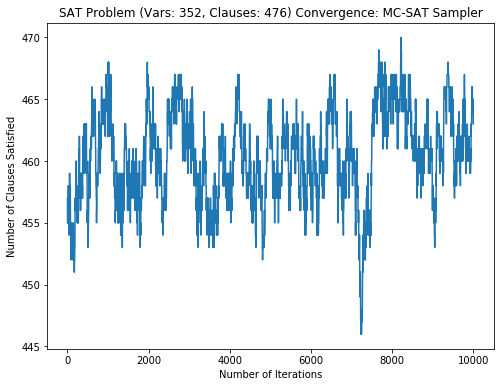

In [37]:
plt.figure(figsize=(8, 6))

plt.plot(num_c_sat_over_time)

plt.xlabel("Number of Iterations")
plt.ylabel("Number of Clauses Satisfied")
plt.title("SAT Problem (Vars: 352, Clauses: 476) Convergence: MC-SAT Sampler")

plt.show()

In [38]:
s.is_satisfied()

False